In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

data = pd.read_csv('fishing.csv',encoding='latin1')


In [2]:
data['type'].value_counts()

benign        428103
defacement     96457
phishing       94111
malware        32520
Name: type, dtype: int64

In [3]:
data

,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://www.garage-pirenne.be/index.php?option=...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement
...,...,...
651186,xbox360.ign.com/objects/850/850402.html,phishing
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing
651188,www.gamespot.com/xbox360/action/deadspace/,phishing
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing


In [4]:
data.isnull().values.any()

False

In [5]:
data['url'].nunique()

641119

In [7]:
mapping = {'benign':0,'defacement':1,'phishing':2,'malware':3}
data['type']=data['type'].map(mapping)

<AxesSubplot:>

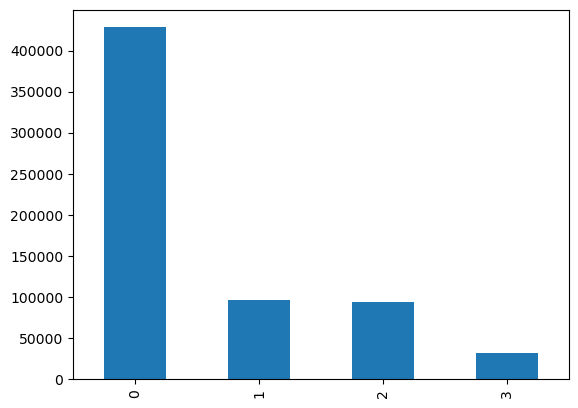

In [8]:
data['type'].value_counts().plot(kind='bar')

In [9]:
X_data=data['url']
y_data=data['type']
X_train,X_test,y_train,y_test=train_test_split(X_data,y_data,test_size=0.2,random_state=0,stratify=y_data)



In [10]:
tokenizer=Tokenizer()
tokenizer.fit_on_texts(X_train)
X_train_encoded=tokenizer.texts_to_sequences(X_train)
print(X_train_encoded[:5])

[[123478, 1, 24621, 6646, 10745], [62, 1, 4823, 6870], [2, 3, 11346, 1, 56, 2073, 153, 69], [3062, 1, 270, 363, 30862, 270, 306, 16], [123479, 44427, 7, 373, 286, 192, 5, 8, 828]]


In [11]:
word_to_index=tokenizer.word_index
print(dict(list(word_to_index.items())[:10]))

{'com': 1, 'http': 2, 'www': 3, 'html': 4, 'php': 5, 'index': 6, 'org': 7, 'id': 8, 'net': 9, 'option': 10}


In [12]:
print ('%d'%max(len(sample)for sample in X_train_encoded))

244


In [13]:
max_len=244
X_train_padded = pad_sequences(X_train_encoded,maxlen = max_len)

In [14]:
X_train_padded

array([[    0,     0,     0, ..., 24621,  6646, 10745],
       [    0,     0,     0, ...,     1,  4823,  6870],
       [    0,     0,     0, ...,  2073,   153,    69],
       ...,
       [    0,     0,     0, ...,  1263, 32944,    90],
       [    0,     0,     0, ...,   186,   726, 10191],
       [    0,     0,     0, ..., 11625,  1840,  2874]])

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding,Flatten
embedding_dim = 8
vocab_size = len(word_to_index)+1

embedding_model = Sequential()
embedding_model.add(Embedding(input_dim=vocab_size,output_dim=embedding_dim,input_length=244))
embedding_model.add(Flatten())

X_train_embed = embedding_model.predict(X_train_padded,batch_size=16)


32560/32560 [==============================] - 53s 2ms/step


In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=15,max_depth=30)
clf.fit(X_train_embed,y_train)

In [ ]:
import tensorflow as tf
X_test_encoded=tokenizer.texts_to_sequences(X_test)
X_test_padded=pad_sequences(X_test_encoded,maxlen=max_len)
with tf.device('/cpu:0'):
    X_test_embed=embedding_model.predict(X_test_padded,batch_size=16)

In [ ]:
y_pred=clf.predict(X_test_embed)
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred,average='weighted')
recall = recall_score(y_test,y_pred,average='weighted')
f1 = f1_score(y_test,y_pred,average='weighted')

In [ ]:
accuracy


In [ ]:
precision


In [ ]:
recall

In [ ]:
f1